In [1]:
import matplotlib.pyplot as plt
import random

相关系数是在参数选择阶段重要的一种选择指标，通过相关系数的高低我们可以挑选出合适的变量来拟合模型

在进行相关分析时
1. 首先需要绘制散点图来判断变量之间的关系形态。<br>
2. 如果是线性关系，则可以利用相关系数来测度两个变量之间的关系强度
3. 然后对相关系数进行显著性检验，以判断样本所反应的关系能否代表两个变量总体上的关系。

In [2]:
# make data
x = [random.randint(0, 1000) for i in range(128)]
positive_y = [
    random.randint(-500, 500)/100 + i*(random.randint(35,40)/100) 
    for i in x
]
negative_y = [
    random.randint(-500, 500)/100 - i*(random.randint(35,40)/100) 
    for i in x
]
random_y = [random.randint(0, 1000) for i in x]

## 绘制散点图来判断变量之间的关系形态

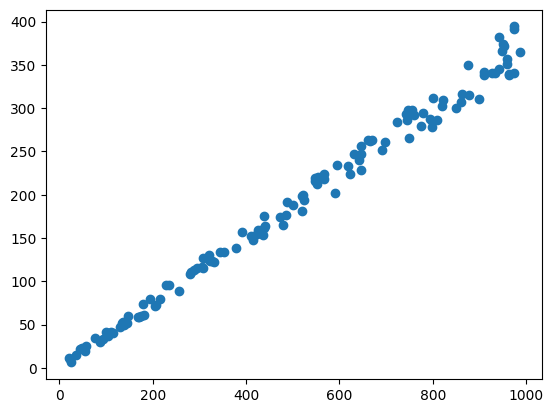

In [3]:
"""
scatter example
positive correlation
"""
fig, ax = plt.subplots()
ax.scatter(x, positive_y)
plt.show()

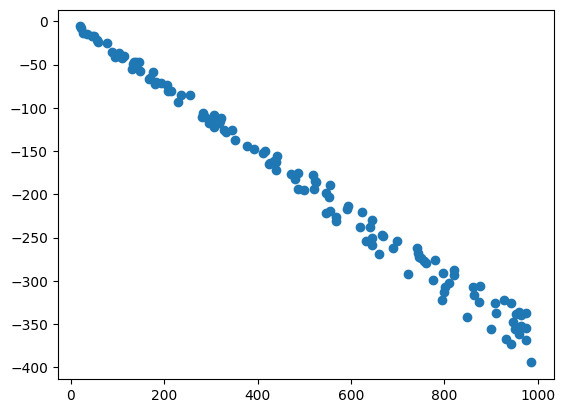

In [4]:
"""
scatter example
negative correlation
"""
fig, ax = plt.subplots()
ax.scatter(x, negative_y)
plt.show()

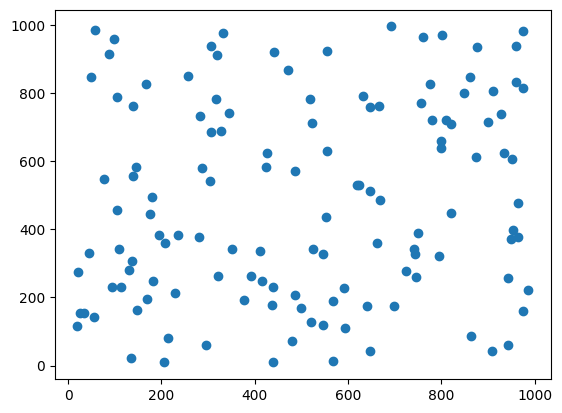

In [5]:
"""
scatter example
no correlation
"""
fig, ax = plt.subplots()
ax.scatter(x, random_y)
plt.show()

## 线性关系下的样本相关系数r--Pearson相关系数
$r = \frac{\sum (x - m_x) (y - m_y)}
                 {\sqrt{\sum (x - m_x)^2 \sum (y - m_y)^2}}$

## 样本相关系数r的显著性检验
一般情况下，总体相关系数$\rho$是未知的，通常是将样本相关系数r来作为其近估计值。<br>

如果对r服从正态分布的假设成立，则可以应用正态分布来检验。当总体相关系数$\rho$为较大的正值时，r呈现左偏分布， 但是当总体相关系数$\rho$为较大的负值时，r呈现右偏分布。只有当$\rho$接近0且样本量n很大时，才能认为r是接近正态分布的随机变量。<br>

对r的正态性假设具有很大的风险，因此通常情况下采用Fisher提出的t检验，该检验可用于小样本(n<=30)，也可以用于大样本。(n>30)<br>

$t=|r|\sqrt{\frac{n-2}{1-r^2}}\sim{t(n-2)}$

*以上部分文字内容摘自中国人民大学出版社出版的《统计学》第六版

开源代码scipy中也提供了pearson相关系数的计算

其中对于相关性显著性检验采用了Beta分布作为原始分布

$f(r) = \frac{{(1-r^2)}^{n/2-2}}{\mathrm{B}(\frac{1}{2},\frac{n}{2}-1)}$

In [6]:
from scipy.stats import pearsonr
p_positive = pearsonr(x, positive_y)
print('p_positive:', p_positive)
p_negative = pearsonr(x, negative_y)
print('p_negative:', p_negative)
p_random = pearsonr(x, random_y)
print('p_random:', p_random)

p_positive: PearsonRResult(statistic=0.9956322137730202, pvalue=1.2425182886358386e-131)
p_negative: PearsonRResult(statistic=-0.9954727522663973, pvalue=1.183795549572992e-130)
p_random: PearsonRResult(statistic=0.15164967314362732, pvalue=0.08749040584013704)


从结果中可以看到：

x与y_positive存在极强的正相关且p值显然小于人为确定的显著性水平α($\alpha=0.01$)，通过显著性检验

x与y_negative存在极强的正相关且通过了显著性检验

x与random_y则没有相关性


除了Pearson相关系数之外还有一些其他的相关性系数

比如Kendall秩相关系数

Kendall秩相关是解决两个属性值排列大小关系相关性的分析方法

In [16]:
# kendall-t test
from scipy.stats import kendalltau
k_x = [random.randint(0, 1000) for i in range(128)]
k_y_random = [pow(random.randint(0, 1000), 2) for i in range(128)]
k_y_positive = [pow(random.randint(0, 1000), 2) for i in range(128)]
k_y_negative = [pow(random.randint(0, 1000), 2) for i in range(128)]

k_x.sort()
k_y_positive.sort()
k_y_negative.sort(reverse=True)

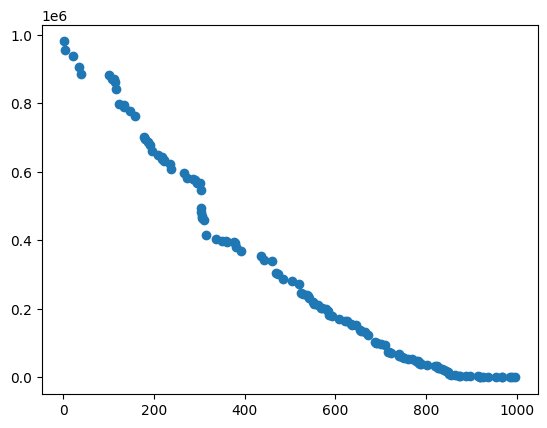

In [17]:
"""
scatter example
negative correlation
"""
fig, ax = plt.subplots()
ax.scatter(k_x, k_y_negative)
plt.show()

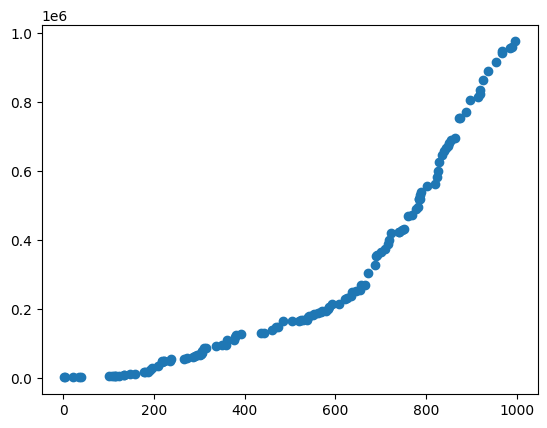

In [18]:
"""
scatter example
positive correlation
"""
fig, ax = plt.subplots()
ax.scatter(k_x, k_y_positive)
plt.show()

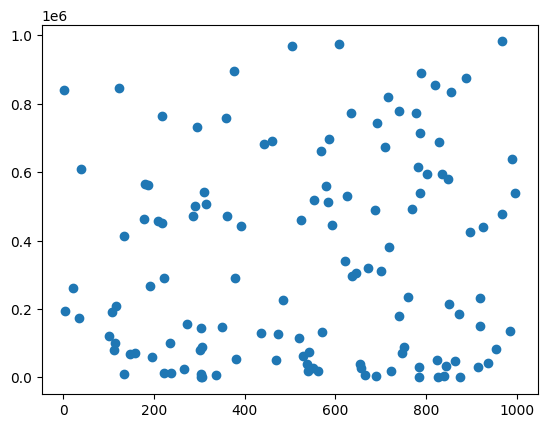

In [19]:
"""
scatter example
no correlation
"""
fig, ax = plt.subplots()
ax.scatter(k_x, k_y_random)
plt.show()

In [11]:
k_random = kendalltau(k_x, k_y_random)
print('k_random', k_random)
k_positive = kendalltau(k_x, k_y_positive)
print('k_positive', k_positive)
k_negative = kendalltau(k_x, k_y_negative)
print('k_negative', k_negative)

k_random SignificanceResult(statistic=-0.04593313297992694, pvalue=0.4423073151681669)
k_positive SignificanceResult(statistic=0.9990146569774601, pvalue=1.1638304206559691e-62)
k_negative SignificanceResult(statistic=-0.9988298349915521, pvalue=1.2458156902024678e-62)
